# RL Algorithms Comparism

## Importing the visualization libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Structuring the files per scenario so they can be merged together

In [2]:
scen1_file_lists = ['fixed_time_results_scen1.csv', 'dqn_result_scen1.csv', 'sarsa_result_scen1.csv', 'a2c_result_scen1.csv']
scen2_file_lists = ['fixed_time_results_scen2.csv', 'dqn_result_scen2.csv', 'sarsa_result_scen2.csv', 'a2c_result_scen2.csv']
scen3_file_lists = ['fixed_time_results_scen3.csv', 'dqn_result_scen3.csv', 'sarsa_result_scen3.csv', 'a2c_result_scen3.csv']

## Load the files into dataframes per scenario

In [3]:
method_names = ['Fixed Time', 'DQN', 'SARSA', 'A2C']  # Names to use for renaming columns

# Load and rename the 'Avg Waiting Time' column uniquely
scen1_dfs = [pd.read_csv(file).rename(columns={'Avg Waiting Time': f'Avg Waiting Time ({method})'}) 
       for file, method in zip(scen1_file_lists, method_names)]

scen2_dfs = [pd.read_csv(file).rename(columns={'Avg Waiting Time': f'Avg Waiting Time ({method})'}) 
       for file, method in zip(scen2_file_lists, method_names)]

scen3_dfs = [pd.read_csv(file).rename(columns={'Avg Waiting Time': f'Avg Waiting Time ({method})'}) 
       for file, method in zip(scen3_file_lists, method_names)]

## Merge the scenarios together by column

In [4]:
scen1_df = scen1_dfs[0]
for df in scen1_dfs[1:]:
    scen1_df = scen1_df.merge(df, on="Step", how="outer")

In [5]:
scen2_df = scen2_dfs[0]
for df in scen2_dfs[1:]:
    scen2_df = scen2_df.merge(df, on="Step", how="outer")

In [6]:
scen3_df = scen3_dfs[0]
for df in scen3_dfs[1:]:
    scen3_df = scen3_df.merge(df, on="Step", how="outer")

In [7]:
scen1_df

,Step,Avg Waiting Time (Fixed Time),Avg Waiting Time (DQN),Avg Waiting Time (SARSA),Avg Waiting Time (A2C)
0,1,0.000000,0.000,0.000000,0.000000
1,2,0.000000,0.000,0.000000,0.000000
2,3,0.000000,0.000,0.000000,0.000000
3,4,0.000000,0.000,0.000000,0.000000
4,5,0.000000,0.000,0.000000,0.000000
...,...,...,...,...,...
995,996,4.900000,0.000,0.000000,0.000000
996,997,5.100000,0.000,0.000000,0.000000
997,998,5.888889,0.000,0.000000,0.000000
998,999,6.875000,0.000,0.000000,0.000000


In [8]:
scen2_df

,Step,Avg Waiting Time (Fixed Time),Avg Waiting Time (DQN),Avg Waiting Time (SARSA),Avg Waiting Time (A2C)
0,1,0.000000,0.000000,0.000000,0.0
1,2,0.000000,0.000000,0.000000,0.0
2,3,0.000000,0.000000,0.000000,0.0
3,4,0.000000,0.000000,0.000000,0.0
4,5,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
995,996,4.933333,0.166667,0.263158,0.0
996,997,5.266667,0.222222,0.500000,0.0
997,998,5.666667,0.277778,0.850000,0.0
998,999,7.076923,0.421053,1.100000,0.0


In [9]:
scen3_df

,Step,Avg Waiting Time (Fixed Time),Avg Waiting Time (DQN),Avg Waiting Time (SARSA),Avg Waiting Time (A2C)
0,1,0.000000,0.000000,0.000000,0.0
1,2,0.000000,0.000000,0.000000,0.0
2,3,0.000000,0.000000,0.000000,0.0
3,4,0.000000,0.000000,0.000000,0.0
4,5,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
995,996,19.576923,2.166667,0.352941,0.0
996,997,20.423077,1.833333,0.437500,0.0
997,998,21.269231,1.500000,0.529412,0.0
998,999,23.958333,1.187500,0.529412,0.0


## Plotting the data for Scenario 1

### Plot all model results together

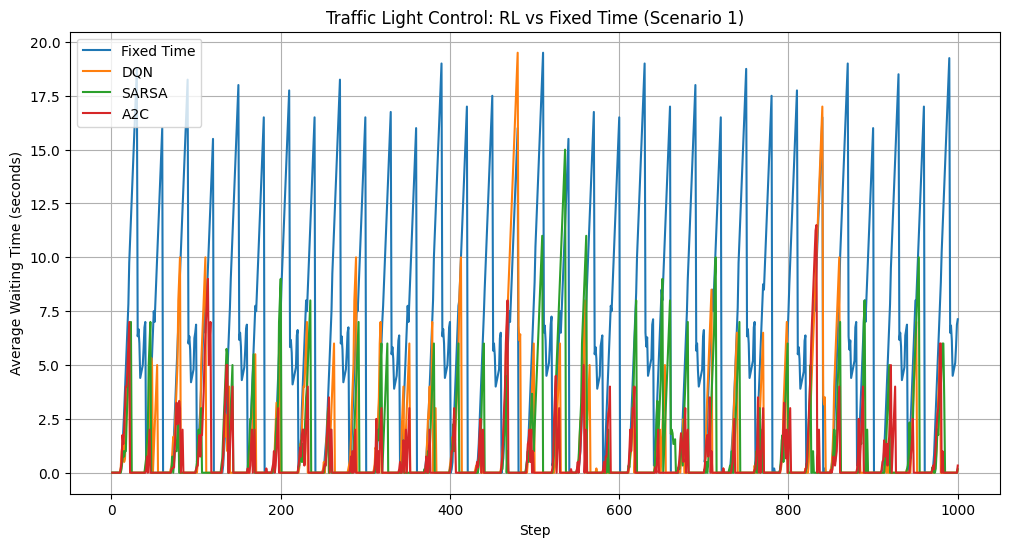

In [10]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen1_df["Step"], scen1_df[f"Avg Waiting Time ({method})"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 1)")
plt.legend()
plt.grid(True)
plt.show()

### Plot Fixed Time model result for scenario 1

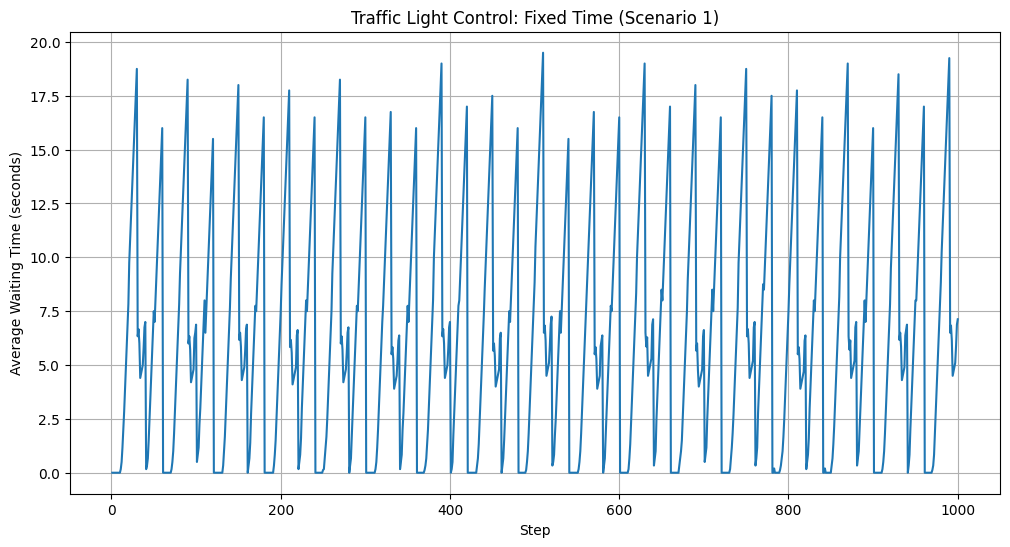

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Avg Waiting Time (Fixed Time)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 1)")
plt.grid(True)
plt.show()

### Plot DQN model result for scenario 1

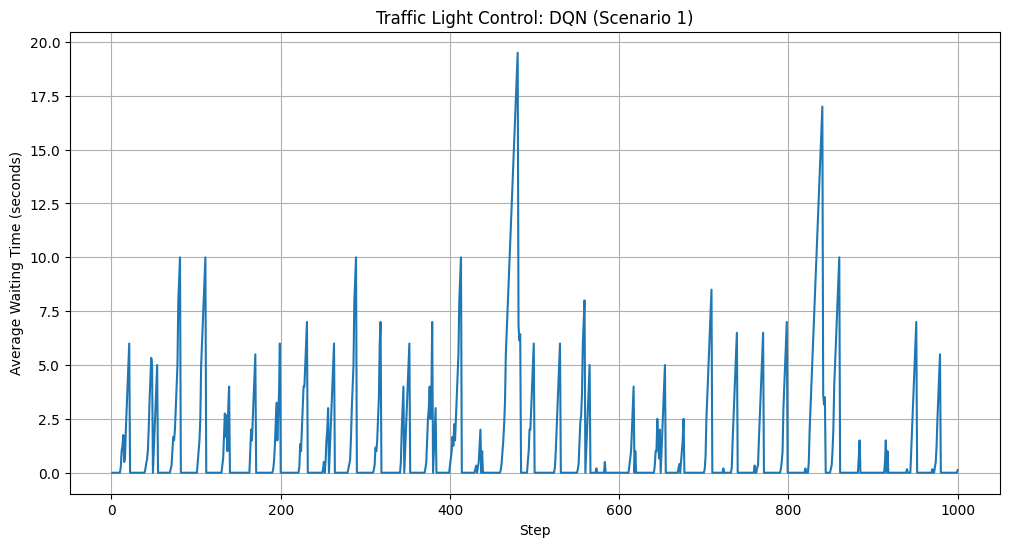

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Avg Waiting Time (DQN)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: DQN (Scenario 1)")
plt.grid(True)
plt.show()

### Plot SARSA model result for scenario 1

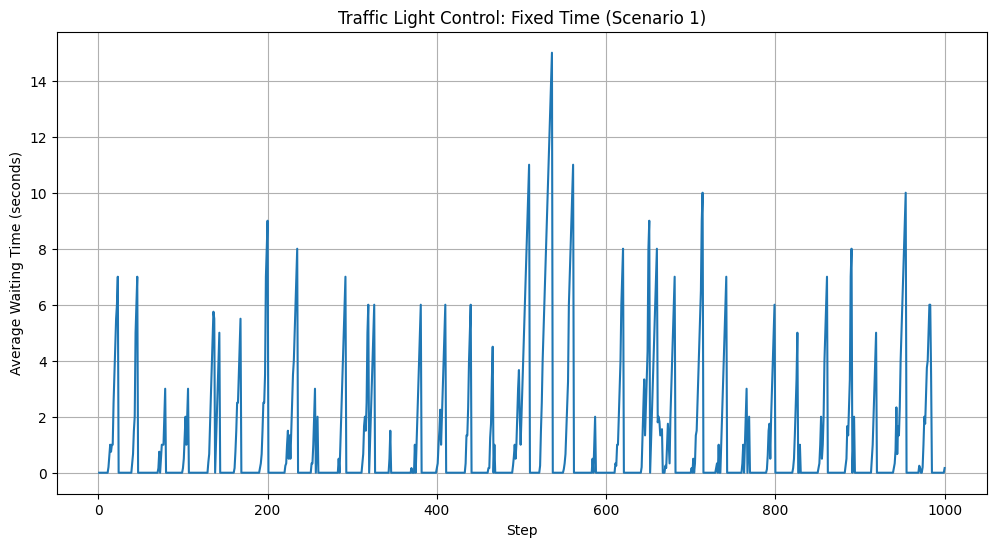

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Avg Waiting Time (SARSA)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 1)")
plt.grid(True)
plt.show()

### Plot A2C model result for scenario 1

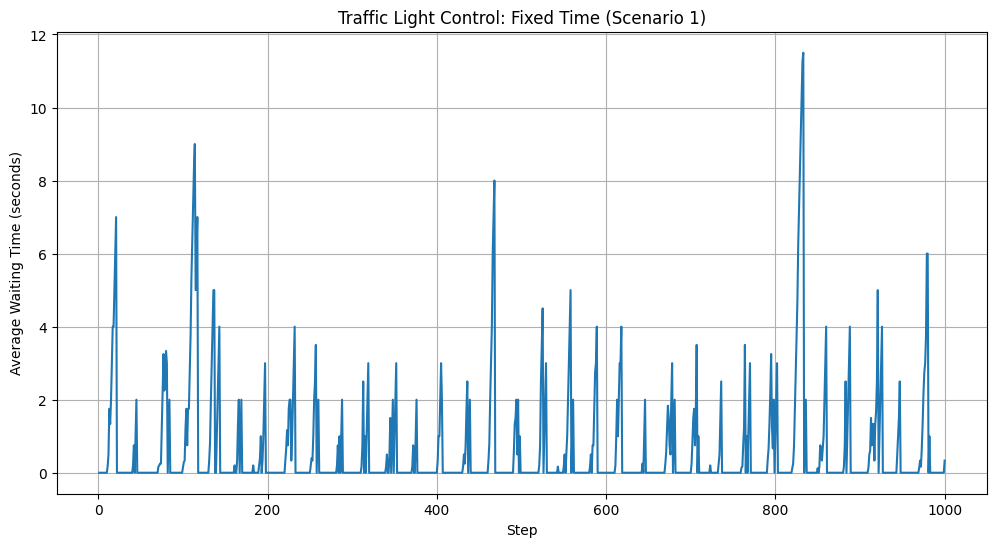

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Avg Waiting Time (A2C)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 1)")
plt.grid(True)
plt.show()

## Plot data for Scenario 2

### Plot all model results together

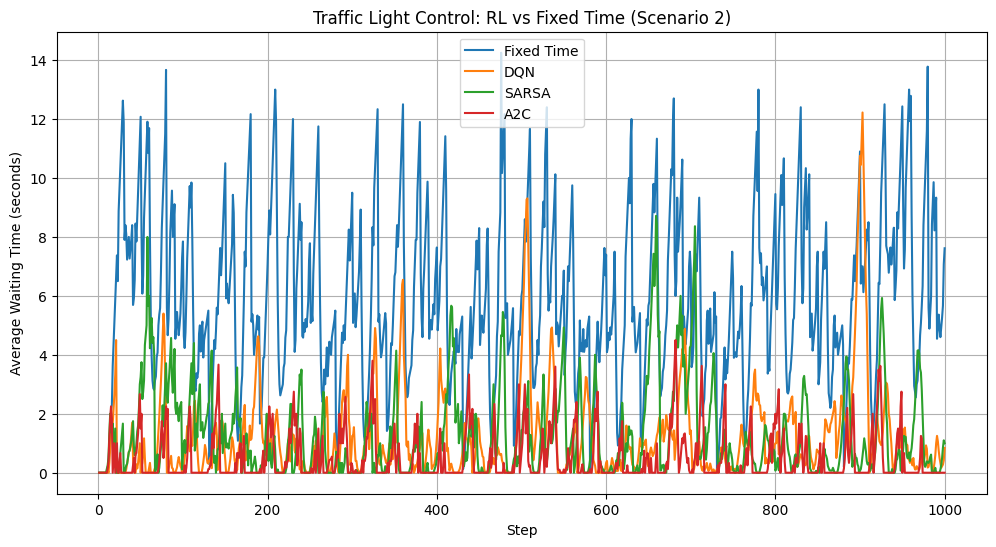

In [15]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen2_df["Step"], scen2_df[f"Avg Waiting Time ({method})"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 2)")
plt.legend()
plt.grid(True)
plt.show()

### Plot Fixed Time model result for scenario 2

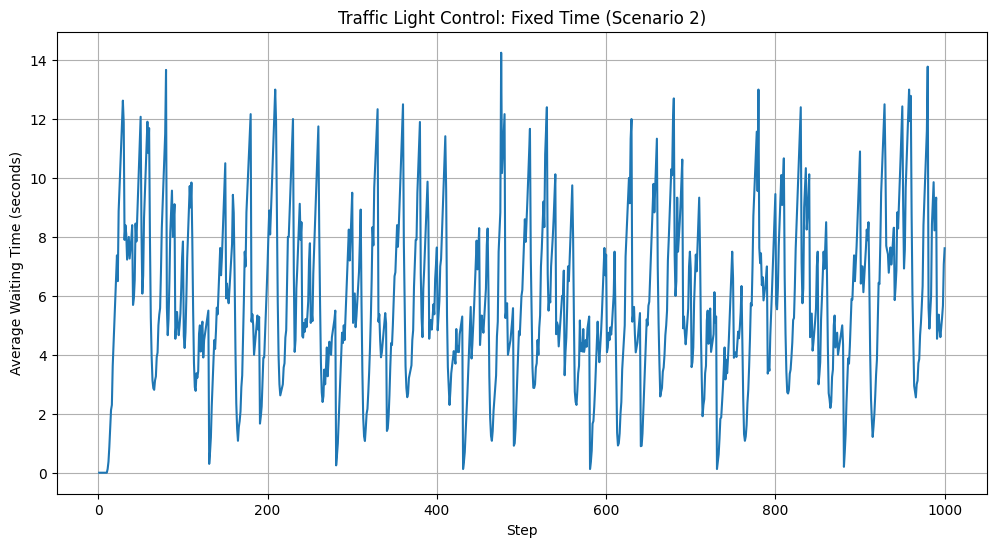

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Avg Waiting Time (Fixed Time)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 2)")
plt.grid(True)
plt.show()

### Plot Fixed DQN model result for scenario 2

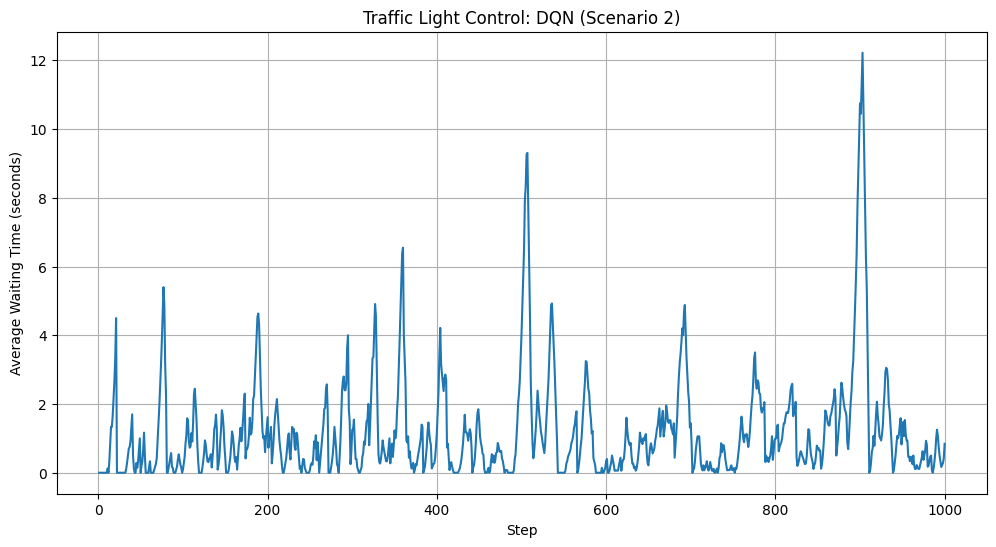

In [17]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Avg Waiting Time (DQN)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: DQN (Scenario 2)")
plt.grid(True)
plt.show()

### Plot Fixed SARSA model result for scenario 2

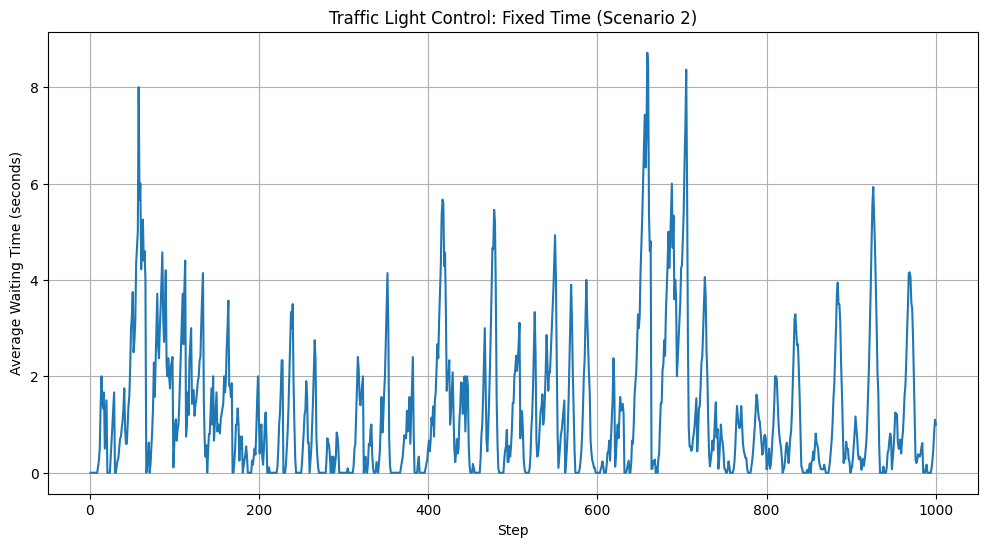

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Avg Waiting Time (SARSA)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 2)")
plt.grid(True)
plt.show()

### Plot A2C model result for scenario 2

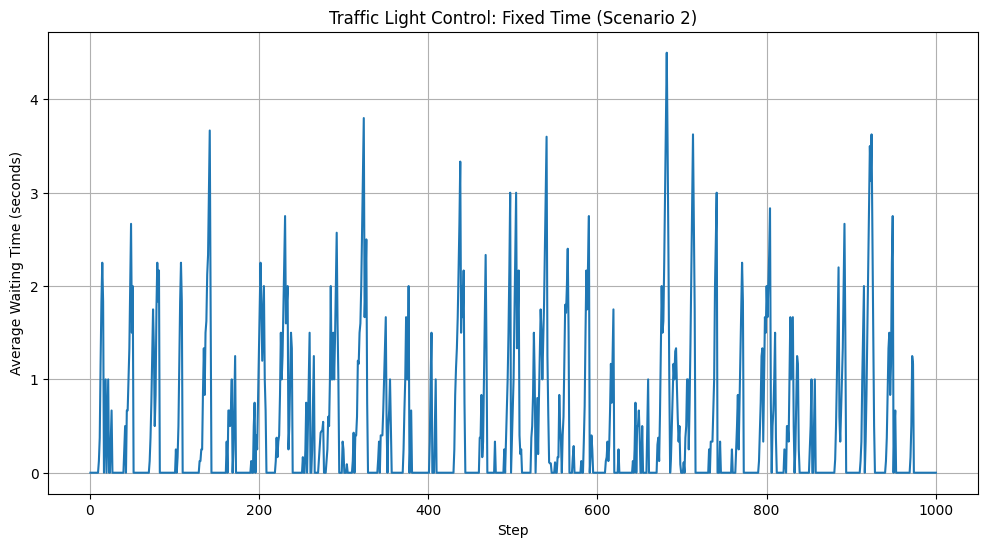

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Avg Waiting Time (A2C)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 2)")
plt.grid(True)
plt.show()

## Plot Data for Scenario 3

### Plot all models together

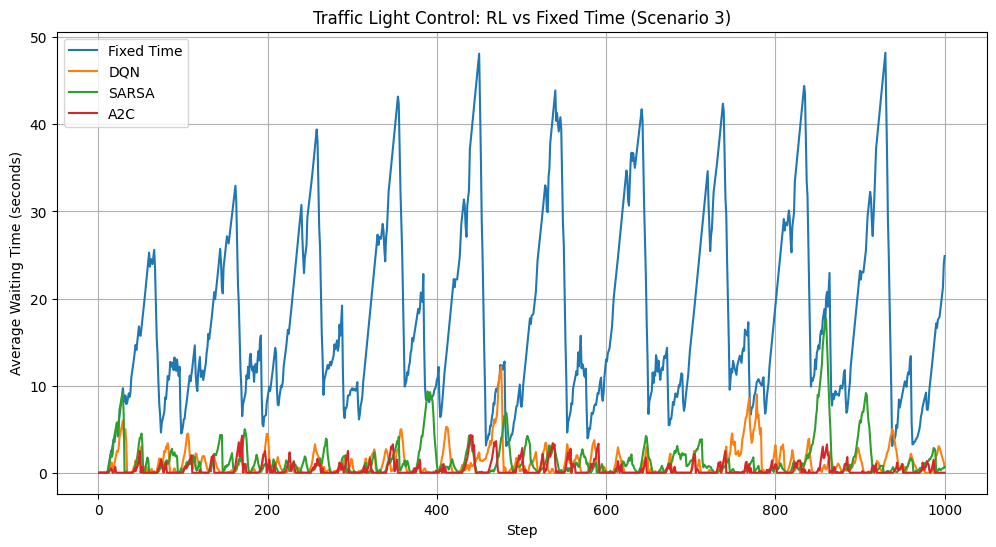

In [20]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen3_df["Step"], scen3_df[f"Avg Waiting Time ({method})"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 3)")
plt.legend()
plt.grid(True)
plt.show()

### Plot Fixed Time model result for scenario 3

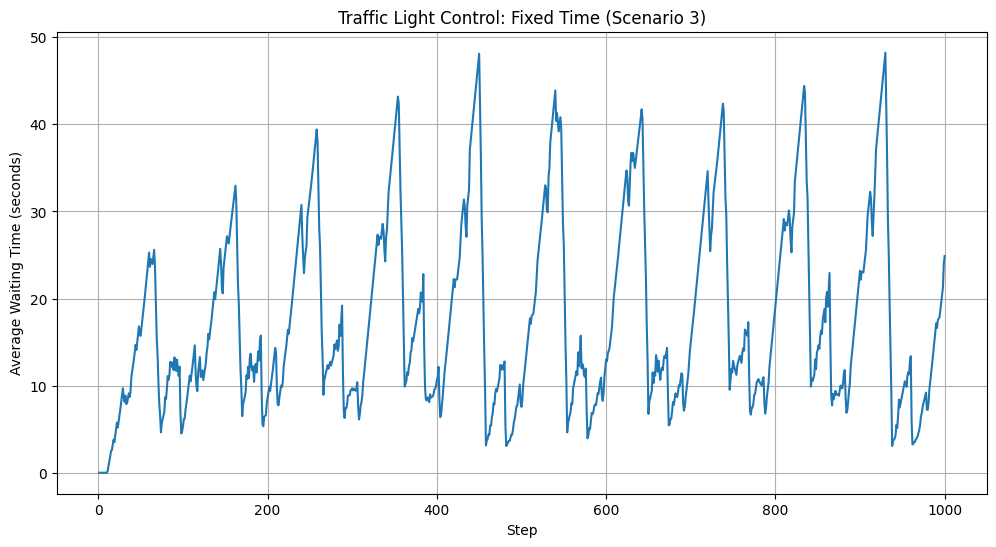

In [21]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Avg Waiting Time (Fixed Time)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 3)")
plt.grid(True)
plt.show()

### Plot DQN model result for scenario 3

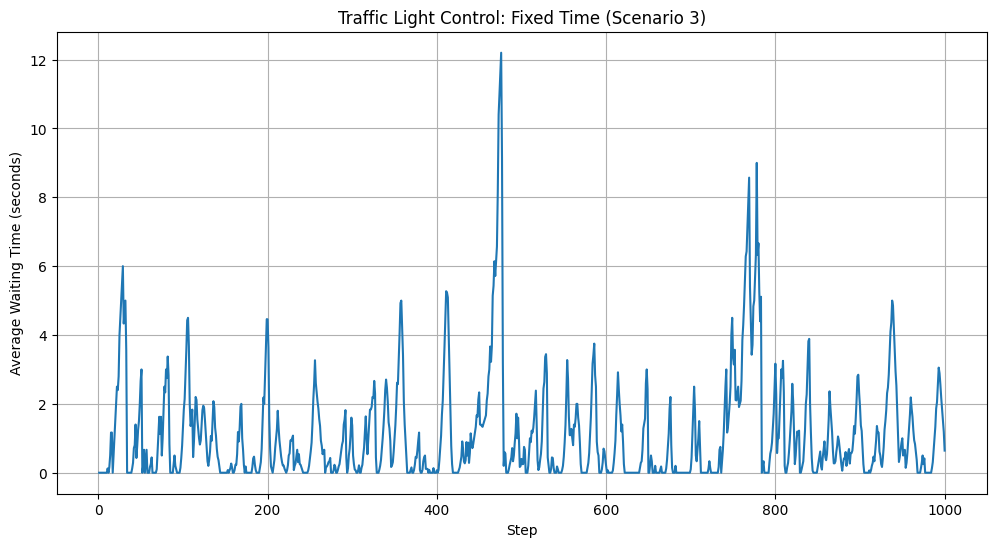

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Avg Waiting Time (DQN)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 3)")
plt.grid(True)
plt.show()

### Plot SARSA model result for scenario 3

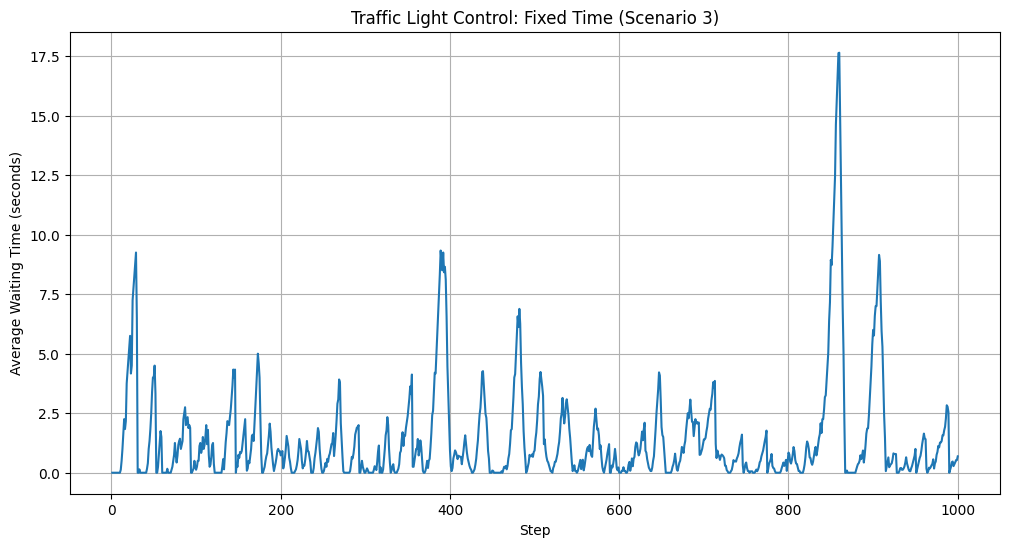

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Avg Waiting Time (SARSA)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 3)")
plt.grid(True)
plt.show()

### Plot A2C model result for scenario 3

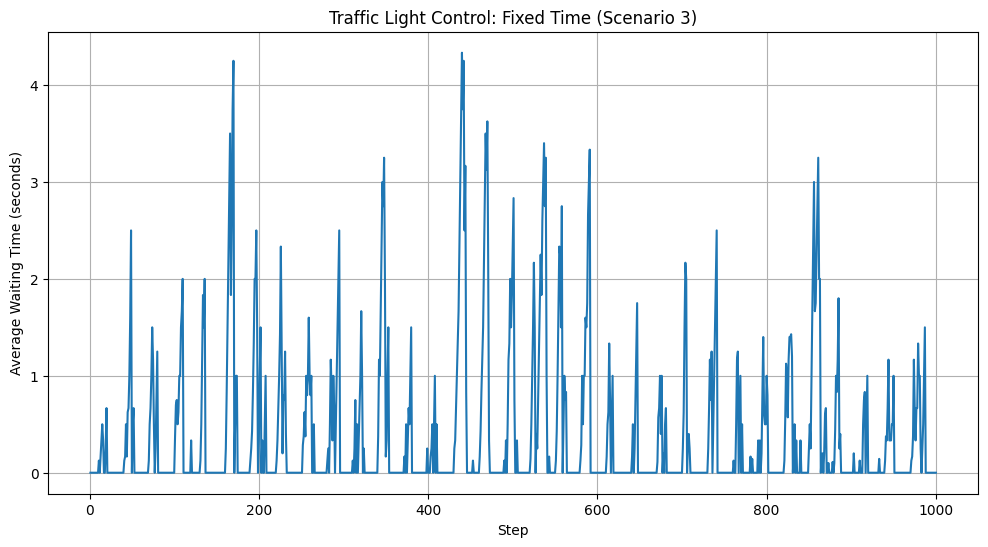

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Avg Waiting Time (A2C)"], label=method)

plt.xlabel("Step")
plt.ylabel("Average Waiting Time (seconds)")
plt.title("Traffic Light Control: Fixed Time (Scenario 3)")
plt.grid(True)
plt.show()

## Get the % Performance of each model compared to Fixed Time model

### Scenario 1

In [25]:
scen1_df.describe()

,Step,Avg Waiting Time (Fixed Time),Avg Waiting Time (DQN),Avg Waiting Time (SARSA),Avg Waiting Time (A2C)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,6.360713,1.195806,1.073288,0.593573
std,288.819436,5.399783,2.691241,2.226576,1.421894
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.958333,0.000000,0.000000,0.000000
50%,500.500000,5.714286,0.000000,0.000000,0.000000
75%,750.250000,10.312500,1.000000,1.000000,0.333333
max,1000.000000,19.500000,19.500000,15.000000,11.500000


In [26]:
ft_mean1 = scen1_df['Avg Waiting Time (Fixed Time)'].mean()
dqn_mean1 = scen1_df['Avg Waiting Time (DQN)'].mean()
sarsa_mean1 = scen1_df['Avg Waiting Time (SARSA)'].mean()
a2c_mean1 = scen1_df['Avg Waiting Time (A2C)'].mean()

In [35]:
(dqn_mean1 - a2c_mean1)/dqn_mean1

0.503621287495881

In [28]:
dqn_performance

0.8120012866680749

In [31]:
scen2_df.describe()

,Step,Avg Waiting Time (Fixed Time),Avg Waiting Time (DQN),Avg Waiting Time (SARSA),Avg Waiting Time (A2C)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.919008,1.187658,1.264842,0.480558
std,288.819436,2.850416,1.534604,1.480167,0.782493
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,4.000000,0.250000,0.142857,0.000000
50%,500.500000,5.400000,0.769231,0.733333,0.000000
75%,750.250000,7.875000,1.526316,1.857143,0.750000
max,1000.000000,14.250000,12.222222,8.714286,4.500000


In [29]:
ft_mean2 = scen2_df['Avg Waiting Time (Fixed Time)'].mean()
dqn_mean2 = scen2_df['Avg Waiting Time (DQN)'].mean()
sarsa_mean2 = scen2_df['Avg Waiting Time (SARSA)'].mean()
a2c_mean2 = scen2_df['Avg Waiting Time (A2C)'].mean()

In [33]:
(dqn_mean2 - a2c_mean2)/dqn_mean2

0.5953736996467006